# Assignment 4 Part 1

CS4172 Machine Learning Lab

Name: Abhiroop Mukherjee

Enrolment Number: 510519109

## Task 1

Download Titanic Dataset (https://www.kaggle.com/heptapod/titanic/version/1#) and do initial pre-processing including normalization, na or zero column handling, train test split, and others (Write an explanation of each in the report).

In [1]:
import pandas as pd

FILE_PATH = "./../ML_DRIVE/Assign_3/titanic/train_and_test2.csv"

# dropping all the na rows 
titanic_df = pd.read_csv(FILE_PATH).dropna()

titanic_df

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1305,1306,39.0,108.9000,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,0
1306,1307,38.5,7.2500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1307,1308,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [2]:
titanic_df.columns

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1',
       'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7',
       'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13',
       'zero.14', 'Pclass', 'zero.15', 'zero.16', 'Embarked', 'zero.17',
       'zero.18', '2urvived'],
      dtype='object')

In [3]:
# all the zero column are not useful (kaggle saying all zero)
# so ignoring them

# also dropping "Passengerid" cause using pandas internal
# 0-index id

titanic_df = titanic_df[
    filter(
        lambda colName: "zero" not in colName, 
        titanic_df.columns
    )
]
titanic_df = titanic_df.drop("Passengerid", axis=1)
titanic_df

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
0,22.0,7.2500,0,1,0,3,2.0,0
1,38.0,71.2833,1,1,0,1,0.0,1
2,26.0,7.9250,1,0,0,3,2.0,1
3,35.0,53.1000,1,1,0,1,2.0,1
4,35.0,8.0500,0,0,0,3,2.0,0
...,...,...,...,...,...,...,...,...
1304,28.0,8.0500,0,0,0,3,2.0,0
1305,39.0,108.9000,1,0,0,1,0.0,0
1306,38.5,7.2500,0,0,0,3,2.0,0
1307,28.0,8.0500,0,0,0,3,2.0,0


In [4]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


def one_hot_encode(X: "pd.DataFrame", col_name: "str") -> "pd.DataFrame":
    """
    alters X by one-hot-encoding the values of the col_name 
    using OneHotEncoder(), returns the altered DataFrame
    """
    encoder = OneHotEncoder()

    encoded_df = pd.DataFrame(
        encoder.fit_transform(X[[col_name]]).toarray(),
        index=X.index,
        columns=encoder.get_feature_names_out()
    )

    X = X.join(encoded_df)
    X = X.drop(col_name, axis=1)

    return X


def standardize(df: "pd.DataFrame", col_name: "str") -> "pd.DataFrame":
    """ 
    alters df by standardizing the values of the col_name 
    using StandardScaler(), returns the altered DataFrame
    """
    scaler = StandardScaler()

    df[[col_name]] = pd.DataFrame(
        data=scaler.fit_transform(df[[col_name]]),
        index=df.index,
        columns=[col_name]
    )
    return df


In [5]:
# Pclass has value ranging from 0 to 3 (doing OneHotEncoding)
# Sex has value ranging from 0 to 2 (doing OneHotEncoding)
# Embarked has value ranging from 0 to 3 (doing OneHotEncoding)

columns_to_encode = ["Pclass", "Embarked", "Sex"]

for column in columns_to_encode:
    titanic_df = one_hot_encode(titanic_df, column)

titanic_df

,Age,Fare,sibsp,Parch,2urvived,Pclass_1,Pclass_2,Pclass_3,Embarked_0.0,Embarked_1.0,Embarked_2.0,Sex_0,Sex_1
0,22.0,7.2500,1,0,0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,38.0,71.2833,1,0,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,26.0,7.9250,0,0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,35.0,53.1000,1,0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,35.0,8.0500,0,0,0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,8.0500,0,0,0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1305,39.0,108.9000,0,0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1306,38.5,7.2500,0,0,0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1307,28.0,8.0500,0,0,0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [6]:
# Age, Fare, sibsp, Parch needs to be standardized as their values 
# are not in the range of 0 to 1

columns_to_standardize = ['Age', "Fare", 'sibsp', "Parch"]

for column in columns_to_standardize:
    titanic_df = standardize(titanic_df, column)

titanic_df

,Age,Fare,sibsp,Parch,2urvived,Pclass_1,Pclass_2,Pclass_3,Embarked_0.0,Embarked_1.0,Embarked_2.0,Sex_0,Sex_1
0,-0.580261,-0.501839,0.480272,-0.445407,0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.662297,0.736023,0.480272,-0.445407,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-0.269621,-0.488790,-0.479537,-0.445407,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.429318,0.384512,0.480272,-0.445407,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.429318,-0.486373,-0.479537,-0.445407,0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,-0.114301,-0.486373,-0.479537,-0.445407,0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1305,0.739957,1.463211,-0.479537,-0.445407,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1306,0.701127,-0.501839,-0.479537,-0.445407,0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1307,-0.114301,-0.486373,-0.479537,-0.445407,0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


## Task 2

Train the SVM using the below kernels with parameters, present the support vectors in the table of the comparison of the model along with accuracy.
1. Linear
2. Polynomial:  where degree d is set to 2, 3 and  5
3. RBF
4. Sigmoid

In [7]:
from sklearn.svm import SVC

def trainSVC(
    X_train: "pd.DataFrame",
    X_test: "pd.DataFrame",
    y_train: "pd.DataFrame",
    y_test: "pd.DataFrame",
    kernel: "str",
    degree: "int" = 3,
    return_model = False
    ):
    """
    degree is ignored if kernel is not 'poly'
    """
    model = SVC(kernel=kernel, degree=degree)
    model.fit(X_train,y_train.iloc[:,0])
    accuracy = model.score(X_test, y_test)

    if return_model:
        return model

    return [kernel, degree if kernel=='poly' else 'None', accuracy, model.support_vectors_]



In [8]:
from sklearn.model_selection import train_test_split

X = titanic_df.drop('2urvived', axis=1)
y = titanic_df[['2urvived']]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

trainSVC(X_train, X_test, y_train, y_test, 'linear')

['linear',
 'None',
 0.767175572519084,
 array([[-0.42494092,  0.51789947,  0.48027176, ...,  1.        ,
          1.        ,  0.        ],
        [ 1.82719538, -0.11142297, -0.47953739, ...,  0.        ,
          0.        ,  1.        ],
        [ 2.060175  , -0.04859551, -0.47953739, ...,  0.        ,
          1.        ,  0.        ],
        ...,
        [ 1.43889602,  0.12353629,  0.48027176, ...,  0.        ,
          0.        ,  1.        ],
        [-1.90047849, -0.10554232,  0.48027176, ...,  1.        ,
          0.        ,  1.        ],
        [-0.26962117, -0.27880114, -0.47953739, ...,  0.        ,
          1.        ,  0.        ]])]

In [9]:
configs = [
    ['linear'],
    ['poly', 2],
    ['poly', 3],
    ['poly', 5],
    ['rbf'],
    ['sigmoid']
]

data = [
    trainSVC(X_train, X_test, y_train, y_test, *config) 
    for config in configs
]

pd.DataFrame(data, columns=['kernel', 'degree (only for poly)', 'accuracy', 'support vectors'])

,kernel,degree (only for poly),accuracy,support vectors
0,linear,None,0.767176,"[[-0.4249409173852111, 0.5178994663203863, 0.4..."
1,poly,2,0.767176,"[[0.0410183164909081, -0.13937249629639864, 0...."
2,poly,3,0.774809,"[[0.0410183164909081, -0.13937249629639864, 0...."
3,poly,5,0.744275,"[[-0.11430142813446498, 0.2685227510922532, -0..."
4,rbf,None,0.782443,"[[0.0410183164909081, -0.4893543511671868, -0...."
5,sigmoid,None,0.690840,"[[-0.11430142813446498, 0.2685227510922532, -0..."


## Task 3

Take only two features from the dataset and train the models with the same parameters and plot the graphs to show the boundaries. Also, create a custom kernel function of your own using a mathematical function for suggestion Logarithmic or Tangent function.

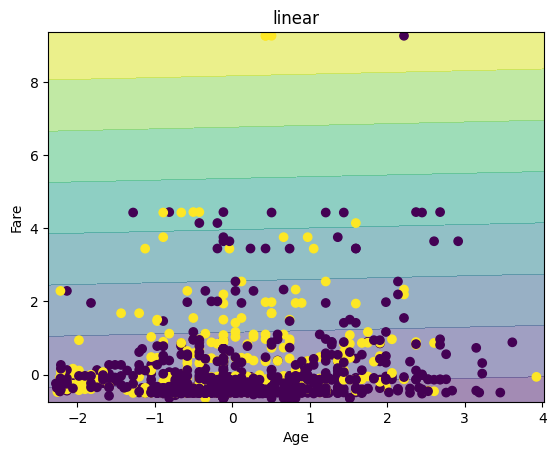

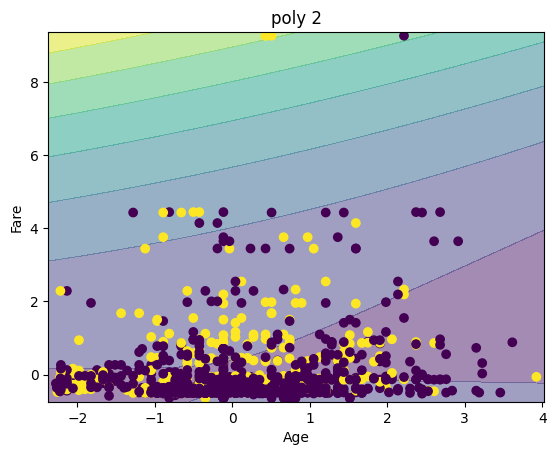

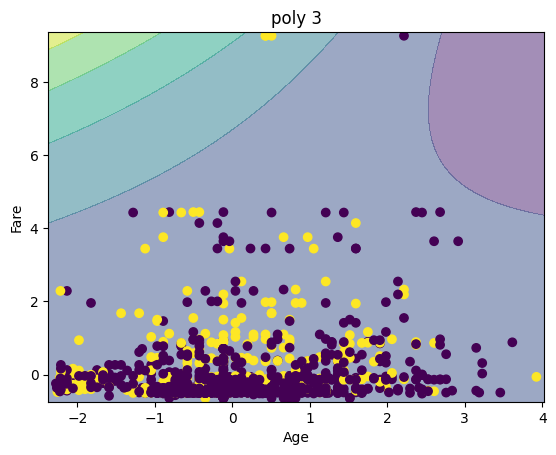

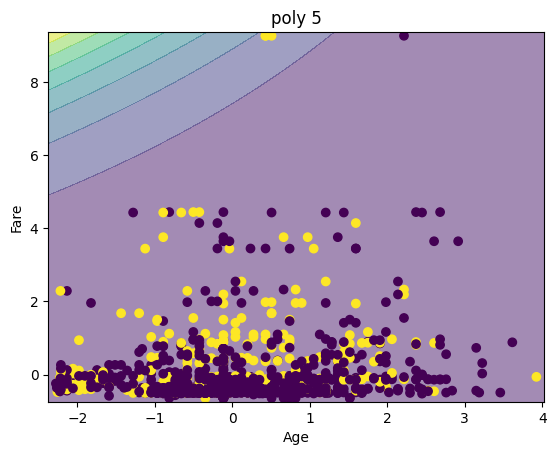

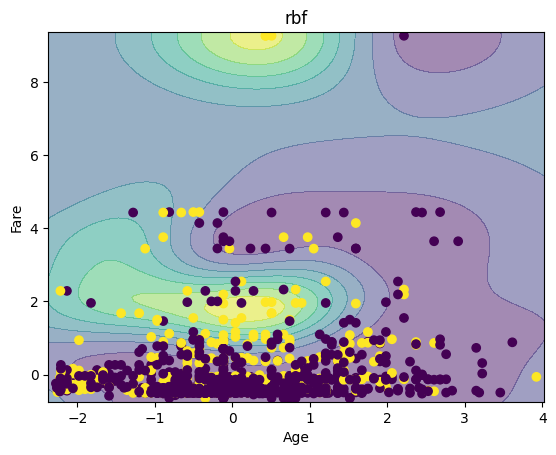

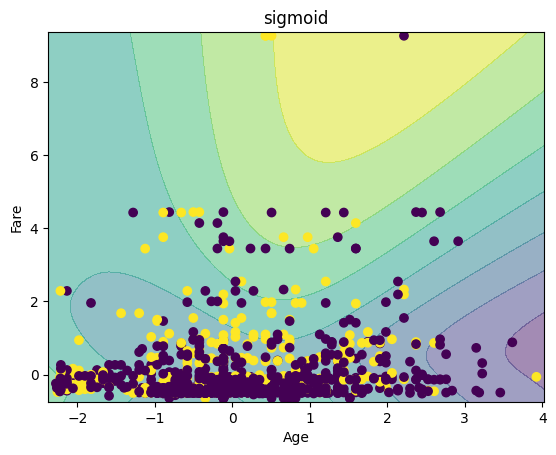

In [10]:
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt

def plot_decision_boundary(kernel: str, degree = 1):
    X = titanic_df.iloc[:, 0:2]
    model = SVC(kernel=kernel, degree=degree).fit(X, y.iloc[:, 0])
    
    disp = DecisionBoundaryDisplay.from_estimator(model, X, alpha=0.5, eps=0.1)
    disp.ax_.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y.iloc[:, 0])
    if(kernel == 'poly'):
        plt.title(f"{kernel} {degree}")
    else:
        plt.title(f"{kernel}")
    plt.show()

for config in configs:
    plot_decision_boundary(*config)


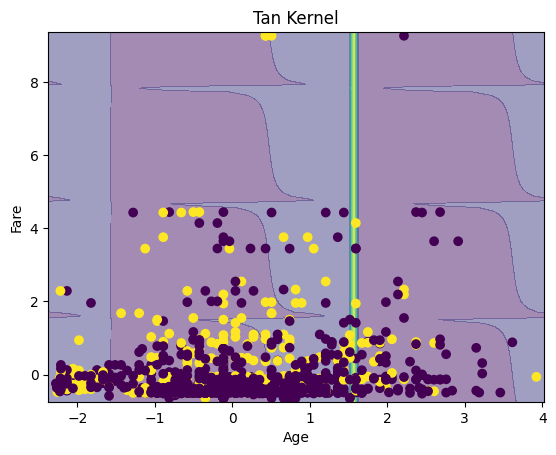

In [11]:
import numpy as np

def my_kernel(X:"np.array", Y: "np.array") -> "np.array":
    M = np.array([[1, 0], [0, 1]])
    return np.dot(np.dot(np.tan(X), M), Y.T)

X_sub = titanic_df.iloc[:, 0:2]

model = SVC(kernel=my_kernel).fit(X_sub, y.iloc[:, 0])
disp = DecisionBoundaryDisplay.from_estimator(model, X_sub, alpha=0.5, eps=0.1)
disp.ax_.scatter(X_sub.iloc[:, 0], X_sub.iloc[:, 1], c=y.iloc[:, 0])
plt.title('Tan Kernel')
plt.show()

## Task 4

For RBF kernel vary the control parameter C with a binary search technique to reach an optimal C value. Plot the graph for validation accuracy. Using this, mention the situation of overfitting and underfitting. Set Gamma to 0.5. Create a function for the whole process. [Maximum 20 runs]

0.1 0.2 0.7099236641221374
0.2 0.4 0.7061068702290076
phase2
0.2 0.30000000000000004 0.4 0.7022900763358778
0.2 0.24995000000000003 0.29990000000000006 0.7099236641221374


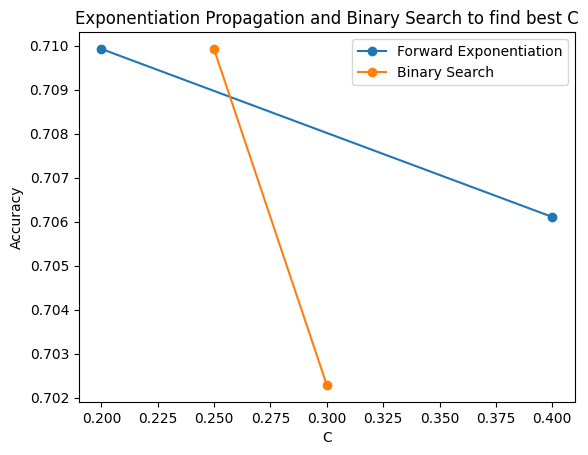

In [14]:
def binary_search_C(
    X_train: "pd.DataFrame", 
    X_val: "pd.DataFrame",
    y_train: "pd.DataFrame", 
    y_val: "pd.DataFrame"):
    right = 0.1
    left = 0
    max_acc = 0
    acc = 0.1
    accuracies = []
    Cs = []
    while acc >= max_acc:
        
        left = right
        right *= 2
        model = SVC(kernel='rbf',gamma = 0.5 ,C = right)\
            .fit(X_train, y_train.iloc[:, 0])
        max_acc = max(max_acc, acc)
        acc = model.score(X_val, y_val)
        print(left, right, acc)

        accuracies.append(acc)
        Cs.append(right)

    plt.plot(Cs, accuracies, 'o-', label="Forward Exponentiation")
    Cs = []
    accuracies = []

    print("phase2")

    while left <= right:
        mid = (left + right)/2
        model = SVC(kernel='rbf',C = mid, gamma = 0.5).fit(X_train, y_train.iloc[:, 0])
        acc = model.score(X_val, y_val)

        accuracies.append(acc)
        Cs.append(mid)

        print(left, mid ,right, acc)

        if acc < max_acc:
            right = mid - 0.0001
        elif acc > max_acc:
            left = mid + 0.0001
            max_acc = acc
        else:
            break

    plt.plot(Cs, accuracies, 'o-', label="Binary Search")
    plt.title("Exponentiation Propagation and Binary Search to find best C")
    plt.xlabel("C")
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    
    
    return mid

X = titanic_df.iloc[:, 0:2]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
best_c = binary_search_C(X_train, X_val, y_train, y_val)




Left side of the graph is where C is low, i.e regularization is strong, hence left side is underfit

Right side of graph is where C is very high, i.e regularization is weak, i.e right side is overfit

## Task 5

Using the above-created function now varies the Gamma parameter with the same binary search techniques as above for the C value which has maximum validation accuracy. Explain, whether the above calculated maximum test accuracy is the optimal test accuracy or there can be a better value of C and Gamma.

0.1 0.2 0.7099236641221374
0.2 0.4 0.7099236641221374
0.4 0.8 0.7061068702290076
phase2
0.4 0.6000000000000001 0.8 0.7061068702290076
0.4 0.49995000000000006 0.5999000000000001 0.7099236641221374


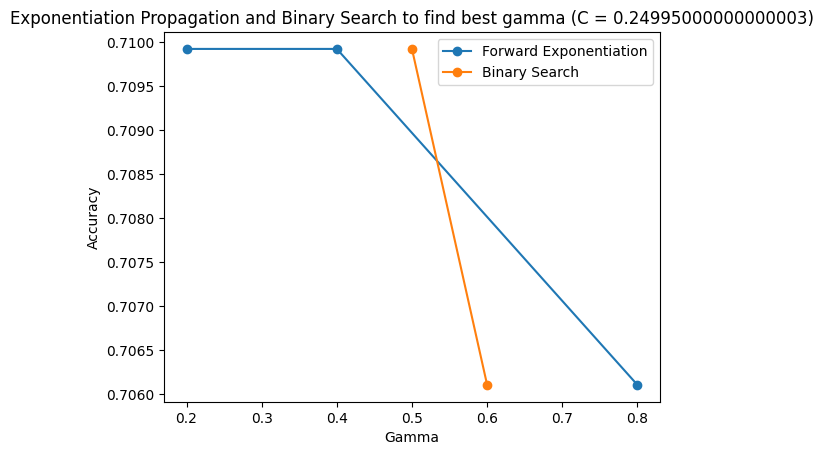

0.49995000000000006

In [15]:
def binary_search_gamma(
    X_train: "pd.DataFrame", 
    X_val: "pd.DataFrame",
    y_train: "pd.DataFrame", 
    y_val: "pd.DataFrame", 
    best_c: "float"):
    right = 0.1
    left = 0
    max_acc = 0
    acc = 0.1
    accuracies = []
    Cs = []
    while acc >= max_acc:
        
        left = right
        right *= 2
        model = SVC(kernel='rbf',gamma = right ,C = best_c)\
            .fit(X_train, y_train.iloc[:, 0])
        max_acc = max(max_acc, acc)
        acc = model.score(X_val, y_val)
        print(left, right, acc)

        accuracies.append(acc)
        Cs.append(right)

    plt.plot(Cs, accuracies, 'o-', label='Forward Exponentiation')
    Cs = []
    accuracies = []

    print("phase2")

    while left <= right:
        mid = (left + right)/2
        model = SVC(kernel='rbf',C = best_c, gamma=mid)\
            .fit(X_train, y_train.iloc[:, 0])
        acc = model.score(X_val, y_val)

        accuracies.append(acc)
        Cs.append(mid)

        print(left, mid ,right, acc)

        if acc < max_acc:
            right = mid - 0.0001
        elif acc > max_acc:
            left = mid + 0.0001
            max_acc = acc
        else:
            break

    plt.plot(Cs, accuracies, 'o-', label="Binary Search")
    plt.title(f"Exponentiation Propagation and Binary Search to find best gamma (C = {best_c})")
    plt.xlabel("Gamma")
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    plt.show()

    
    
    return mid


binary_search_gamma(X_train, X_val, y_train, y_val, best_c)

Binary Search assumes that there is only one maxima of accuracy (and corresponding minima of loss) and will search for that loss minima, it does not take into the account the possibility of multiple minima's (which can be seen by rerunning the last two cells where we get different C and gamma for every run), so this method will give us a local minima, with no guarantee of the minima being the global minima. Hence there may be a better C and gamma value pair which gives better accuracy.